In [ ]:
# # 실행시 등장하는 URL을 클릭하여 허용해주면 인증KEY가 나타난다. 복사하여 URL아래 빈칸에 붙여넣으면 마운트에 성공하게된다.
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# pip install torch torchvision

In [137]:
import torch

if torch.cuda.is_available():
  device_count = torch.cuda.device_count()
  print("device_count: {}".format(device_count))
  for device_num in range(device_count):
    print("device {} capability {}".format(
        device_num, torch.cuda.get_device_capability(device_num)))
    print("device {} name {}".format(
        device_num, torch.cuda.get_device_name(device_num)))
else:
  print("no cuda device")

no cuda device


In [138]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import Dataset,DataLoader
import time
from PIL import Image
%matplotlib inline

In [139]:
is_cuda=False
if torch.cuda.is_available():
    is_cuda = True
print("is_cuda:",is_cuda)

is_cuda: False


In [140]:
#폴더안에 모든 파일 목록을 읽음
path= "C:\dev\Pytorch-workspace_class"   

simple_transform = transforms.Compose([transforms.Resize((48,48)),transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# train = ImageFolder("/content/drive/My Drive/data/emotion/train",simple_transform)

# valid = ImageFolder("C:\dev\Pytorch-workspace_class",simple_transform)


def imshow(inp):

    """Imshow for Tensor."""

    inp = inp.numpy().transpose((1, 2, 0))

    mean = np.array([0.485, 0.456, 0.406])

    std = np.array([0.229, 0.224, 0.225])

    inp = std * inp + mean

    inp = np.clip(inp, 0, 1)

    plt.imshow(inp)

   


In [141]:
class Net(nn.Module):

    def __init__(self):

        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3,stride=1,padding=0)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3,stride=1,padding=0)
        self.conv2_drop = nn.Dropout2d(p=0.25)
        self.conv2_drop = nn.Dropout2d(p=0.5)
        self.fc1 = nn.Linear(32*22*22, 128)
        self.fc2 = nn.Linear(128, 7)

    def forward(self, x):
        # print("x", x.shape)
        x= F.relu(self.conv1(x))
        # print("x conv1 + relu : ", x.shape)
        x=F.relu(self.conv2(x))
        # print("x conv2 + relu : ", x.shape)
        x=F.max_pool2d(x,2)
        # print("x max pool(2) : ", x.shape)
        x = F.dropout(x,p=0.25, training=self.training)
        # print("x dropout : ", x.shape)
        x=x.view(-1,32*22*22)
        x=F.relu(self.fc1(x))
        x = F.dropout(x,p=0.5, training=self.training)
        x=self.fc2(x)

        # print("x view : ", x.shape)
        return F.log_softmax(x,dim=1)


In [150]:
device=torch.device('cpu')
# model = torch.load(path+'\TJ_hoon.pt',map_location=device)
model=Net()
model.load_state_dict(torch.load(path+'\TJ_hoon.pt',map_location=device))
model.eval()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=15488, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=7, bias=True)
)

In [151]:
# data=ImageFolder("C:\dev\Pytorch-workspace_class\images", simple_transform)


valid = ImageFolder("C:\dev\Pytorch-workspace_class",simple_transform)

validloader=DataLoader(valid)
dataiter=iter(validloader)
images,labels=dataiter.next()
print(labels)


tensor([2])


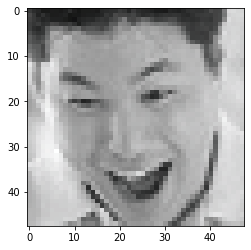

In [152]:
imshow(make_grid(images))

In [153]:
res=['angry','disgust','fear','happy','neutral','sad','surprise']

In [156]:
model(images)

tensor([[-1.7901, -4.0175, -2.5847, -0.5719, -4.2837, -3.1426, -2.1354]],
       grad_fn=<LogSoftmaxBackward>)